### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [2]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Dataframe size
print(stroke_data.shape)

(5110, 12)


### Exploratory Data Analysis

In [4]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
correlation_matrix = stroke_data.corr()
print(correlation_matrix)

                         id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.003084  0.006388  
age                         0.238171  0.333398  0.245257  
hypertension                0.174474  0.167811  0.127904  
heart_disease               0.161857  0.041357  0.134914  
avg_glucose_level           1.000000  0.175502  0.131945  
bmi                         0.175502  1.000000  0.042374  
stroke                    

In [6]:
correlation_matrix['stroke'].sort_values(ascending = False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

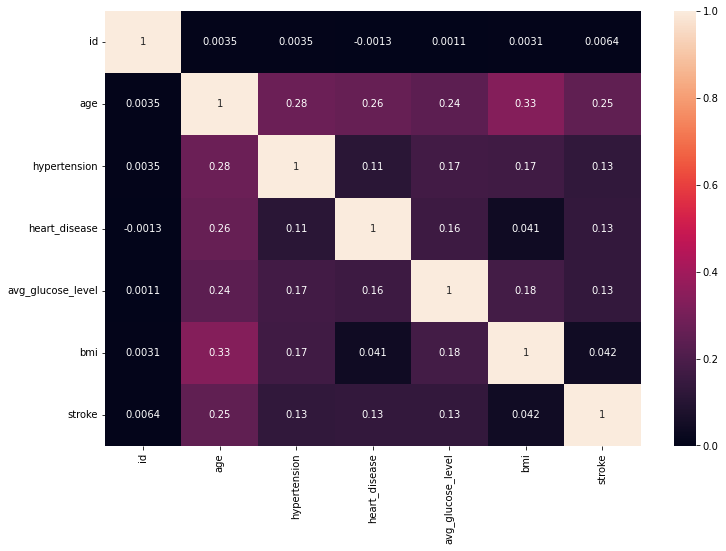

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(data = stroke_data.corr(), annot = True)
plt.show()

In [8]:
# Gender distribution
print(stroke_data['gender'].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [9]:
# Target distribution
print(stroke_data['stroke'].value_counts())

0    4861
1     249
Name: stroke, dtype: int64


/Users/onyekachukwuokonji/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


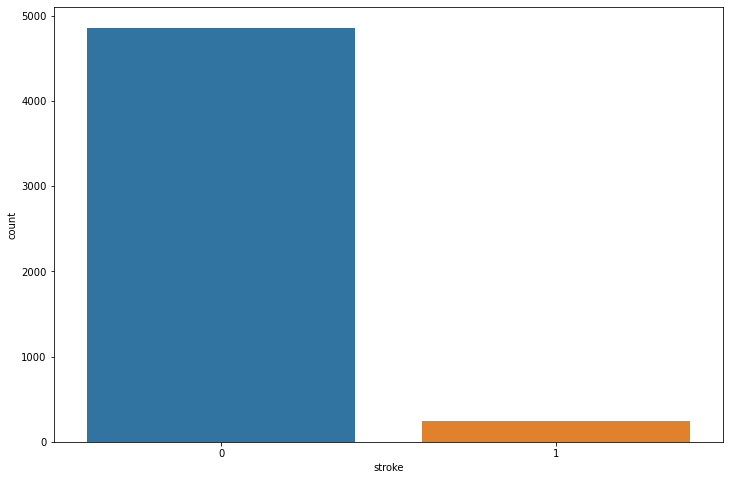

In [10]:
plt.figure(figsize = (12, 8))
sns.countplot(stroke_data['stroke'])
plt.show()

In [11]:
# Dropping instance with 'other' gender since irrelevant to prediction
stroke_data[stroke_data['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


### Feature Extraction

In [12]:
stroke_data.drop([3116], inplace = True)
stroke_data.drop(['id'], axis = 1, inplace = True)

In [13]:
stroke_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
# Confirming dropping operation
print(stroke_data['gender'].value_counts())

Female    2994
Male      2115
Name: gender, dtype: int64


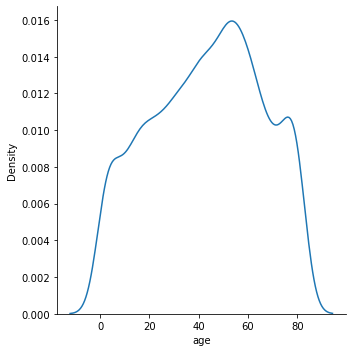

In [15]:
# Plot distribution of ages
sns.displot(data = stroke_data, x = 'age', kind = 'kde')

In [16]:
# Grouping patients with hypertension who developed a stroke
stroke_data.groupby(['hypertension'])['stroke'].sum()

hypertension
0    183
1     66
Name: stroke, dtype: int64

In [17]:
# Grouping patients with heart disease who developed a stroke
stroke_data.groupby(['heart_disease'])['stroke'].sum()

heart_disease
0    202
1     47
Name: stroke, dtype: int64

In [18]:
# Grouping stroke sufferers based on residential area
stroke_data.groupby(['Residence_type'])['stroke'].sum()

Residence_type
Rural    114
Urban    135
Name: stroke, dtype: int64

In [19]:
# Grouping people who smoked, had hypertension and heart disease and suffered a stroke
stroke_data.groupby(['hypertension', 'heart_disease', 'smoking_status'])['stroke'].sum()

hypertension  heart_disease  smoking_status 
0             0              Unknown            35
                             formerly smoked    43
                             never smoked       50
                             smokes             21
              1              Unknown             8
                             formerly smoked     8
                             never smoked        8
                             smokes             10
1             0              Unknown             4
                             formerly smoked    15
                             never smoked       28
                             smokes              6
              1              Unknown             0
                             formerly smoked     4
                             never smoked        4
                             smokes              5
Name: stroke, dtype: int64

In [20]:
# Obtaining data types
stroke_data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [21]:
print(f"Different kinds of gender feature is: {stroke_data['gender'].unique()}")
print(f"Different kinds of ever married feature is: {stroke_data['ever_married'].unique()}")
print(f"Different kinds of worktype feature is: {stroke_data['work_type'].unique()}")
print(f"Different kinds of Residence_type feature is: {stroke_data['Residence_type'].unique()}")
print(f"Different kinds of smoking_status feature is: {stroke_data['smoking_status'].unique()}")

Different kinds of gender feature is: ['Male' 'Female']
Different kinds of ever married feature is: ['Yes' 'No']
Different kinds of worktype feature is: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Different kinds of Residence_type feature is: ['Urban' 'Rural']
Different kinds of smoking_status feature is: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [22]:
# Encoding Categorical Columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
stroke_data = pd.get_dummies(data = stroke_data, columns = categorical_columns)

In [23]:
stroke_data.head(20)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,NaN,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
6,74.0,1,1,70.09,27.4,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
7,69.0,0,0,94.39,22.8,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
8,59.0,0,0,76.15,NaN,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
9,78.0,0,0,58.57,24.2,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0


In [24]:
# Dataframe shape after encoding
print(stroke_data.shape)

(5109, 21)


In [25]:
# Checking for missing values
stroke_data.isnull().sum()

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
stroke                              0
gender_Female                       0
gender_Male                         0
ever_married_No                     0
ever_married_Yes                    0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Rural                0
Residence_type_Urban                0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [26]:
# Handling missing values
stroke_data.fillna(method = 'bfill', inplace = True)

In [27]:
# Confirming handling of missing values
stroke_data.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [28]:
X = stroke_data.drop(['stroke'], axis = 1)
Y = stroke_data['stroke']

In [29]:
X.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,32.5,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)

In [31]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [32]:
lr = LogisticRegression(class_weight = 'balanced', solver = 'liblinear', max_iter = 300, dual = True, random_state = 42)
lsvc = LinearSVC(class_weight = 'balanced', dual = False)
svc = SVC(class_weight = 'balanced', kernel = 'poly')
dtc = DecisionTreeClassifier(max_depth = 8, class_weight = 'balanced')
etc = ExtraTreeClassifier(max_depth = 8, class_weight = 'balanced')
rfc = RandomForestClassifier(n_estimators = 300, max_depth = 8)

### Fitting models on imbalanced data

In [33]:
print(f"fitting logistic regression classiifier : {lr.fit(x_train,y_train)}")
print(f"fitting linear svc classifier : {lsvc.fit(x_train, y_train)}")
print(f"fitting svc kernel classifier : {svc.fit(x_train, y_train)}")
print(f"fitting decision tree classifier : {dtc.fit(x_train, y_train)}")
print(f"fitting extra tree classifier : {etc.fit(x_train, y_train)}")
print(f"fitting random forest classifier : {rfc.fit(x_train, y_train)}")

/Users/onyekachukwuokonji/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


fitting logistic regression classiifier : LogisticRegression(class_weight='balanced', dual=True, max_iter=300,
                   random_state=42, solver='liblinear')
fitting linear svc classifier : LinearSVC(class_weight='balanced', dual=False)
fitting svc kernel classifier : SVC(class_weight='balanced', kernel='poly')
fitting decision tree classifier : DecisionTreeClassifier(class_weight='balanced', max_depth=8)
fitting extra tree classifier : ExtraTreeClassifier(class_weight='balanced', max_depth=8)
fitting random forest classifier : RandomForestClassifier(max_depth=8, n_estimators=300)


f1_score : 0.09203980099502489


/Users/onyekachukwuokonji/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


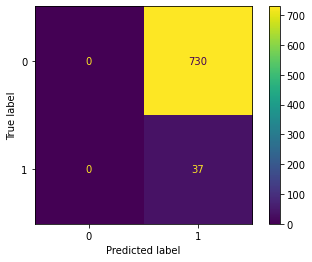

In [34]:
y_pred = lr.predict(x_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
cm = confusion_matrix(y_test, y_pred)
print(f"f1_score : {f1_score(y_test, y_pred)}")
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

f1_score : 0.09203980099502489


/Users/onyekachukwuokonji/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


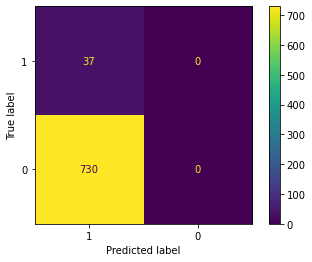

In [35]:
y_pred = lsvc.predict(x_test)
print(f"f1_score : {f1_score(y_test, y_pred)}")
cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [1, 0])
disp.plot()
plt.show()

f1_score : 0.14342629482071714


/Users/onyekachukwuokonji/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


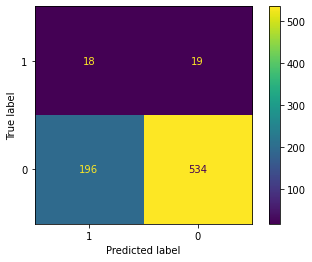

In [36]:
y_pred = svc.predict(x_test)
print(f"f1_score : {f1_score(y_test, y_pred)}")
cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [1, 0])
disp.plot()
plt.show()

/Users/onyekachukwuokonji/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


f1_score : 0.0


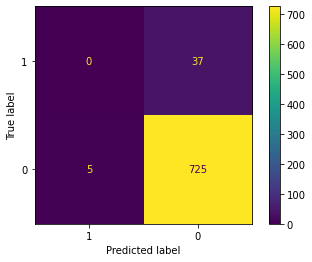

In [37]:
y_pred = dtc.predict(x_test)
print(f"f1_score : {f1_score(y_test, y_pred)}")
cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [1, 0])
disp.plot()
plt.show()

/Users/onyekachukwuokonji/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ExtraTreeClassifier was fitted without feature names
  warnings.warn(


f1_score : 0.09285714285714287


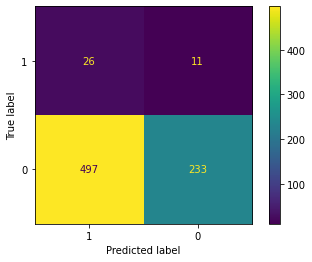

In [38]:
y_pred = etc.predict(x_test)
print(f"f1_score : {f1_score(y_test, y_pred)}")
cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [1, 0])
disp.plot()
plt.show()

### Resampling the dataset and fitting

In [39]:
# pip install -U imbalanced-learn

In [40]:
x_tr = scaler.fit_transform(X)

In [41]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_tr_adj, y_tr_adj = sm.fit_resample(x_tr, Y)

In [47]:
total_f1 = []

fold = StratifiedKFold(n_splits = 2)
i = 1
for train_index, test_index in fold.split(x_tr_adj, y_tr_adj):
    X_TRAIN, X_TEST = x_tr_adj[train_index], x_tr_adj[test_index]
    Y_TRAIN, Y_TEST = y_tr_adj[train_index], y_tr_adj[test_index]
    
    lr.fit(X_TRAIN, Y_TRAIN)
    
    Y_PRED = lr.predict(X_TEST)
    
    print(f"--------------------- Fitting Logistic Regression ----------------------")
    
    print(f"fold {i} f1_score : {f1_score(Y_TEST, Y_PRED)}")
    
    i + 1
    
    total_f1.append(f1_score(Y_TEST, Y_PRED))

print(f"-------------------- Mean F1-SCORE ------------------------")
print(np.mean(total_f1))

--------------------- Fitting Logistic Regression ----------------------
fold 1 f1_score : 0.7954767011113278
--------------------- Fitting Logistic Regression ----------------------
fold 1 f1_score : 0.8026107594936709
-------------------- Mean F1-SCORE ------------------------
0.7990437303024993


In [49]:
total_f1 = []

fold = StratifiedKFold(n_splits = 2)
i = 1
for train_index, test_index in fold.split(x_tr_adj, y_tr_adj):
    X_TRAIN, X_TEST = x_tr_adj[train_index], x_tr_adj[test_index]
    Y_TRAIN, Y_TEST = y_tr_adj[train_index], y_tr_adj[test_index]
    
    lsvc.fit(X_TRAIN, Y_TRAIN)
    
    Y_PRED = lsvc.predict(X_TEST)
    
    print(f"--------------------------- Fitting Linear SVC --------------------------")
    
    print(f"fold {i} f1_score : {f1_score(Y_TEST, Y_PRED)}")
    
    i + 1
    
    total_f1.append(f1_score(Y_TEST, Y_PRED))
    
print(f"-------------------- Mean F1-SCORE ------------------------")
print(np.mean(total_f1))

--------------------------- Fitting Linear SVC --------------------------
fold 1 f1_score : 0.8010794140323826
--------------------------- Fitting Linear SVC --------------------------
fold 1 f1_score : 0.8055609947131388
-------------------- Mean F1-SCORE ------------------------
0.8033202043727607


In [50]:
total_f1 = []

fold = StratifiedKFold(n_splits = 2)
i = 1
for train_index, test_index in fold.split(x_tr_adj, y_tr_adj):
    X_TRAIN, X_TEST = x_tr_adj[train_index], x_tr_adj[test_index]
    Y_TRAIN, Y_TEST = y_tr_adj[train_index], y_tr_adj[test_index]
    
    svc.fit(X_TRAIN, Y_TRAIN)
    
    Y_PRED = svc.predict(X_TEST)
    
    print(f"-------------------------- Fitting SVC Kernel --------------------------")
    
    print(f"fold {i} f1_score : {f1_score(Y_TEST, Y_PRED)}")
    
    i + 1
    
    total_f1.append(f1_score(Y_TEST, Y_PRED))
    
print(f"-------------------- Mean F1-SCORE ------------------------")
print(np.mean(total_f1))

-------------------------- Fitting SVC Kernel --------------------------
fold 1 f1_score : 0.8433081541739299
-------------------------- Fitting SVC Kernel --------------------------
fold 1 f1_score : 0.8473642800944138
-------------------- Mean F1-SCORE ------------------------
0.8453362171341718


In [51]:
total_f1 = []

fold = StratifiedKFold(n_splits = 2)
i = 1
for train_index, test_index in fold.split(x_tr_adj, y_tr_adj):
    X_TRAIN, X_TEST = x_tr_adj[train_index], x_tr_adj[test_index]
    Y_TRAIN, Y_TEST = y_tr_adj[train_index], y_tr_adj[test_index]
    
    dtc.fit(X_TRAIN, Y_TRAIN)
    
    Y_PRED = dtc.predict(X_TEST)
    
    print(f"------------------------ Fitting Decision Tree Classifier ---------------------------")
    
    print(f"fold {i} f1_score : {f1_score(Y_TEST, Y_PRED)}")
    
    i + 1
    
    total_f1.append(f1_score(Y_TEST, Y_PRED))


print(f"-------------------- Mean F1-SCORE ------------------------")
print(np.mean(total_f1))

------------------------ Fitting Decision Tree Classifier ---------------------------
fold 1 f1_score : 0.8435296359824662
------------------------ Fitting Decision Tree Classifier ---------------------------
fold 1 f1_score : 0.8523386161577117
-------------------- Mean F1-SCORE ------------------------
0.847934126070089


In [52]:
total_f1 = []

fold = StratifiedKFold(n_splits = 2)
i = 1
for train_index, test_index in fold.split(x_tr_adj, y_tr_adj):
    X_TRAIN, X_TEST = x_tr_adj[train_index], x_tr_adj[test_index]
    Y_TRAIN, Y_TEST = y_tr_adj[train_index], y_tr_adj[test_index]
    
    etc.fit(X_TRAIN, Y_TRAIN)
    
    Y_PRED = etc.predict(X_TEST)
    
    print(f"------------------------- Fitting Extra Trees Classifier -----------------------")
    
    print(f"fold {i} f1_score : {f1_score(Y_TEST, Y_PRED)}")
    
    i + 1
    
    total_f1.append(f1_score(Y_TEST, Y_PRED))

print(f"-------------------- Mean F1-SCORE ------------------------")
print(np.mean(total_f1))

------------------------- Fitting Extra Trees Classifier -----------------------
fold 1 f1_score : 0.7020585048754062
------------------------- Fitting Extra Trees Classifier -----------------------
fold 1 f1_score : 0.7520708919283375
-------------------- Mean F1-SCORE ------------------------
0.7270646984018718


In [53]:
total_f1 = []

fold = StratifiedKFold(n_splits = 2)
i = 1
for train_index, test_index in fold.split(x_tr_adj, y_tr_adj):
    X_TRAIN, X_TEST = x_tr_adj[train_index], x_tr_adj[test_index]
    Y_TRAIN, Y_TEST = y_tr_adj[train_index], y_tr_adj[test_index]
    
    rfc.fit(X_TRAIN, Y_TRAIN)
    
    Y_PRED = rfc.predict(X_TEST)
    
    print(f"-------------------------- Fitting Random Forest Classifier ----------------------- ")
    
    print(f"fold {i} f1_score : {f1_score(Y_TEST, Y_PRED)}")
    
    i + 1
    
    total_f1.append(f1_score(Y_TEST, Y_PRED))

print(f"-------------------- Mean F1-SCORE ------------------------")
print(np.mean(total_f1))

-------------------------- Fitting Random Forest Classifier ----------------------- 
fold 1 f1_score : 0.8569769692277918
-------------------------- Fitting Random Forest Classifier ----------------------- 
fold 1 f1_score : 0.857087975412985
-------------------- Mean F1-SCORE ------------------------
0.8570324723203884


### In conclusion, Random Forest Classifier produced the best f1-score